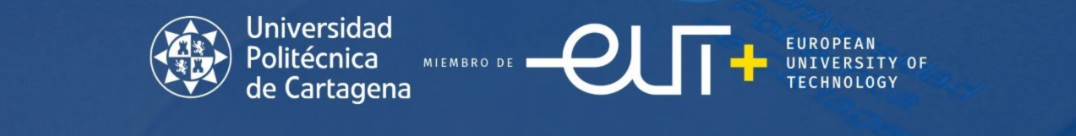

**MACHINE LEARNING II**
                    
# PRÁCTICA 1. SESIÓN 1 <br> RAZONAMIENTO PROBABILISTA O APROXIMADO





En esta primera práctica de la asignatura, se establecen los siguientes objetivos:

1. Repaso de conceptos básicos de probabilidad y razonamiento probabilista.
2. Implementación en el entorno Python de funciones para el cálculo de probabilidades condicionales, y aplicación del Teorema de Bayes.
3. Resolución de problemas numéricos y situaciones complejas mediante el razonamiento probabilista.


El razonamiento probabilista es una forma de lógica que se basa en la probabilidad para representar y manipular la incertidumbre de los conocimientos y las creencias. Se utiliza para modelar situaciones complejas y dinámicas que involucran variables aleatorias, dependencias, evidencias y predicciones.

En esta práctica, se comienza con la preparación del entorno de trabajo, para ello, se va a necesitar importar una serie de librerías que  permitan realizar los cálculos necesarios. Para poder realizar lo mencionado, en el siguiente cuadro de código, escriba lo siguiente:

"import numpy as np"

 Esta librería es esencial para trabajar con datos numéricos en Python debido a su gran eficiencia y flexibilidad en el manejo de operaciones matemáticas y estadísticas, incluyendo matrices. Entre sus múltiples usos, destacan:

1.	Permite crear y manipular arrays multidimensionales de forma más rápida y eficiente que las listas de Python tradicionales.

2.	Operaciones matemáticas y aritméticas: element-wise, funciones matemáticas…

3.	Álgebra lineal.

4.	Estadística.

5.	Generación de números aleatorios.

6.	Indexación y multiplexación.

7.	Integración con otras librerías.
                 
Estas son solo algunas de las muchas aplicaciones que tiene esta librería, la cual, se usará en gran medida a lo largo de las prácticas.


In [1]:
# Importe la librería numpy
import numpy as np

## 1 - Fundamentos de probabilidad

### Ejercicio 1.1: Lanzamiento de dados

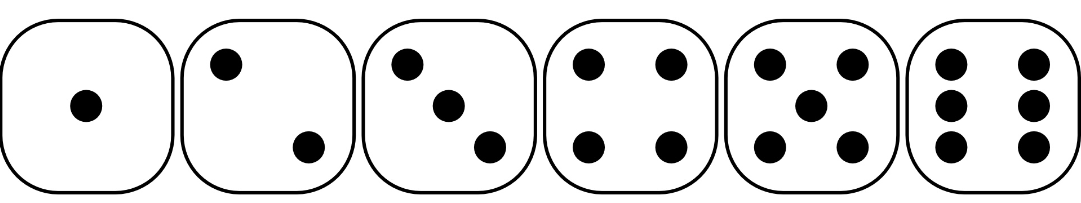

El primer ejercicio propuesto consiste en analizar el lanzamiento de unos dados.

Para este ejercicio, se pide implementar una función '"prob_evento"' que acepte como parámetro el número de caras favorables (por ejemplo, si se buscan caras pares, hay tres posibilidades o tres eventos favorables, que serían el 2,4 y 6) y el total de caras que tiene el dado. Seguidamente, calcule la probabilidad de obtener un número par al lanzar un dado de 6 caras.

- Calcule la probabilidad de obtener un número par al lanzar un dado de 6 caras.
- Calcule la probabilidad de obtener un 7 al sumar las caras obtenidas tras lanzar el dado dos veces.

NOTA: Para definir una función, se usará el siguiente código   "def ...(x,y)" donde se le dará un nombre adecuado y deberemos indicar las variables que se desean tomar como parámetros.

In [2]:
# LANZAMIENTO DE UN DADO

# Defina la función indicada.
def prob_evento(casos_favorables: int, casos_posibles=6):
    prob = casos_favorables / casos_posibles * 100
    return f"Probabilidad total: {prob:.2f}%"

# Calcule la probabilidad de obtener un número par al lanzar un dado de 6 caras.
print(prob_evento(casos_favorables=3))

# Calcule la probabilidad de obtener un 7 la sumar las caras obtenidas tras lanzar el dado.
print(prob_evento(casos_favorables=6, casos_posibles=36))

Probabilidad total: 50.00%
Probabilidad total: 16.67%


### Ejercicio 1.2: Probabilidades con naipes

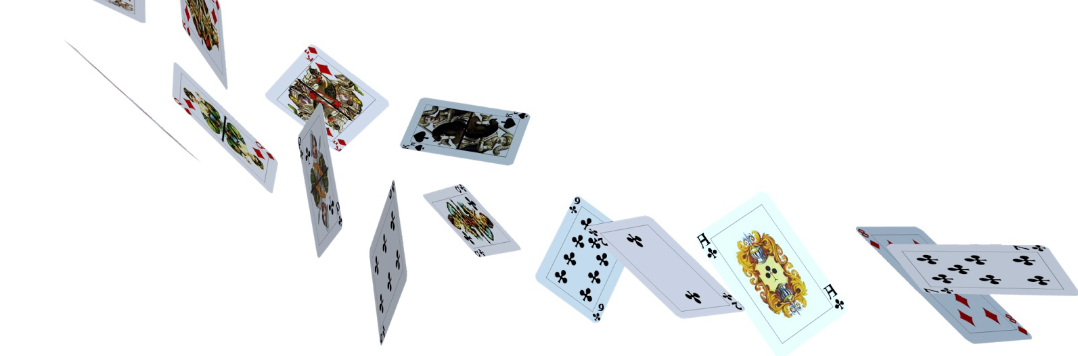

Una vez resuelto este sencillo ejercicio, continuaremos con un caso algo más complejo: el estudio de probabilidades (condicionales) con naipes.

Para la realización del siguiente ejercicio, se necesitarán los siguientes datos:
1. Número de palos en la baraja: 4
2. Número de ases en cada palo: 1
3. Total de naipes en el mazo: 52

Calcule la probabilidad de sacar un as, sabiendo que el naipe extraído es de picas.

Para ello, implemente una función llamada "prob_cond_Y_dado_X", basada en la Regla del Producto:

$P(X = x, Y = y) = P(X = x)P(Y = y|X = x) $

Con los siguientes argumentos:
- "probX_y": probabilidad conjunta de dos eventos $P(X = x, Y = y)$
- "probX": probabilidad del primero de ellos $P(X = x)$


In [3]:

# PROBABILIDAD CONDICIONAL CON NAIPES

# Defina la fucnión deseada con la que vamos a trabajar
def prob_con_Y_dado_X(probX_y: float, probX: float):
    if probX == 0:
        raise ValueError("P(X=x) no puede ser cero")
    return probX_y / probX

# Calcule la probablidad de sacar un as dado que el naipe es de picas
probX_y = 1/52      # Probabilidad de sacar un as
probX = (52/4)/52   # Probabilidad de sacar que la carta seleccionada sea de picas

prob_final = prob_con_Y_dado_X(probX_y, probX) * 100
print(f"probabilidad de sacar un as, sabiendo que el naipe extraído es de picas: {prob_final:.2f}%")

probabilidad de sacar un as, sabiendo que el naipe extraído es de picas: 7.69%


### Ejercicio 1.3: Independencia de eventos

En este ejercicio, se estudiará la independencia de un par de eventos relacionados con el lanzamiento de un dado. A la hora de implementar el código, no se va a asumir su independencia, sino que se implementará una función llamada "son_indep" para verificar si este supuesto se cumple o no.

- Verifique si los eventos de obtener un número par y obtener un número mayor que 4 en un dado son independientes.

En este ejercicio, use la función "np.isclose" para verificar si el producto de las probabilidades de los eventos A y B es aproximadamente igual a la probabilidad de que ambos sucedan simultáneamente.

In [4]:
# Comience definiendo la función que verifique si dos eventos son independientes o no.
def son_idep(prob_A: float, prob_B: float, prob_AB: float):
    return np.isclose(prob_A * prob_B, prob_AB)

# Verifique si los eventos de obtener un número par y obtener un número mayor que 4 son indpendientes.
prob_A = 3/6    # Primer lanzamiento da un número par
prob_B = 2/6    # Segundo lanzamiento da un número > 4
prob_AB = 1/6   # par y >4

resultado = son_idep(prob_A, prob_B, prob_AB)
print(f"¿Son independientes? {resultado}")

¿Son independientes? True


## 2 - Teorema de Bayes

La fórmula del teorema de Bayes es la siguiente:


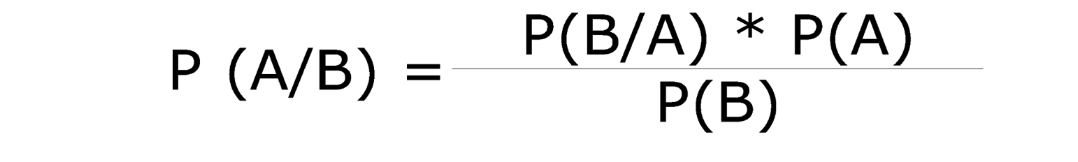

Para poder comprender mejor este teorema, se aplicará de forma práctica en una serie de ejercicios:


### Ejercicio 1.4: Detección de spam

En su cuenta de correo recibe correo spam a diario, ¿sería posible encontrar algún patrón que nos ayude a identificar si un correo es spam o no? Se ha estudiado que hay una palabra en concreto que aparece con bastante frecuencia en este tipo de correos, así que, a partir de ese dato, vamos a intentar llevar el proceso a cabo. Para los cálculos, necesitaremos los siguientes datos:

1. Probabilidad de que un correo recibido sea spam: 25%
2. Probabilidad de que cierta palabra aparezca en un correo spam: 80%
3. Probabilidad de que cierta palabra aparezca en un correo que NO sea spam: 5%

Calcule la probabilidad de que un correo sea spam sabiendo que contiene la palabra sospechosa.



Como paso previo a la resolución, será necesario implementar una función que llamaremos "teorema_bayes" con que implemente dicho teorema. Esta función deberá de tomar como argumento las probabilidades a priori (`prob_A` y `prob_B`) y la probabilidad condicional utilizada en el mismo (`prob_B_dado_A`).

In [5]:
# Defina la función teorema_bayes
def teorema_bayes(prob_A: float, prob_B: float, prob_B_dado_A: float):
    """
    Devuelve P(A|B) = [P(B|A) * P(A)] / P(B)
    prob_A: P(A)
    prob_B: P(B)
    prob_B_dado_A: P(B|A)
    """
    if prob_B == 0:
        raise ValueError("P(B) no puede ser cero")
    return (prob_B_dado_A * prob_A) / prob_B

In [6]:
#Introduzca los datos dados por el ejercicio
prob_A = 0.25
prob_no_A = 1 - prob_A
prob_B_dado_A = 0.8
prob_B_dado_no_A = 0.05
prob_B = prob_B_dado_A * prob_A + prob_B_dado_no_A * prob_no_A

#Calcule la probabilidad de que un correo sea spam sabiendo que contiene la palabra sospechosa.
resultado = teorema_bayes(prob_A, prob_B, prob_B_dado_A)
print(f"Probabilidad de que un correo sea spam si contiene la palabra sospechosa: {resultado}")

Probabilidad de que un correo sea spam si contiene la palabra sospechosa: 0.8421052631578947


### Ejercicio 1.5: Monedas trucadas

A partir de este apartado, será necesario tener bien claros los conceptos previos de los ejercicios anteriores, ya que serán fundamentales para la correcta resolución del que nos ocupa.

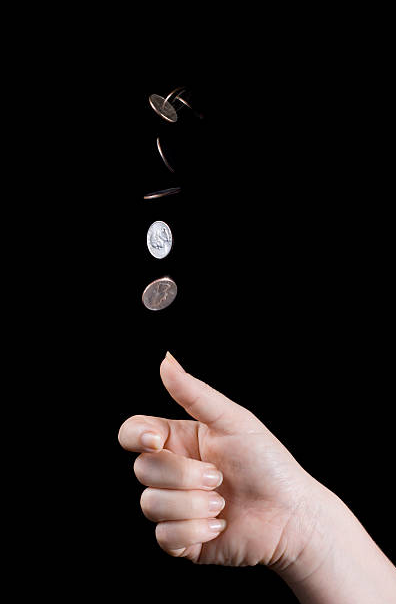

En este caso, tenemos 3 monedas y una de ellas está trucada. Dicha moneda únicamente nos dará el resultado de "cara", por lo tanto su probabilidad de obtener "cruz" será nula. Considerando que las otras 2 monedas sí que son equiprobables:

- Calcule la probabilidad de que la moneda esté trucada, sabiendo que se ha obtenido cara 2 veces.

Para ello, cree una función llamada "prob_moneda_trucada" que tome como argumentos "monedas" y "trucadas".


In [7]:
# Implemente la función 'probabilidad moneda trucada' que devuelva la prob. de sacar cara dos veces 
# considerando las probabilidades según el enunciado
def prob_moneda_trucada(monedas=3, trucadas=1):
    # A priori
    prob_trucada = trucadas / monedas
    prob_no_trucada = 1 - prob_trucada

    # Casos de estudio
    prob_2caras_dado_trucada = 1.0
    prob_2caras_dado_no_trucada = 1/2 * 1/2

    prob_2caras = prob_trucada * prob_2caras_dado_trucada + prob_no_trucada * prob_2caras_dado_no_trucada

    return (prob_2caras_dado_trucada * prob_trucada) / prob_2caras

#Calcule la probabilidad de que la moneda sea trucada, sabiendo que se ha obtenido cara 2 veces.
resultado = prob_moneda_trucada()
print(f"Probabilidad de que la moneda sea trucada después de obtener cara dos veces: {resultado}")

Probabilidad de que la moneda sea trucada después de obtener cara dos veces: 0.6666666666666666


### Ejercicio 1.6: Predicción de lluvia

En este ejercicio, se calculará la probabilidad de que un suceso ocurra dado su historial previo.



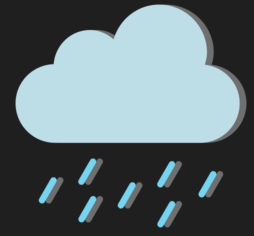

Suponga que ha planeado ir a un concierto la semana que viene, y sabe que en esta región llueve 30 días al año; casualmente, el día del concierto está previsto que sea uno de ellos. Es sabido que las previsiones meteorológicas siempre cuentan con un margen de error, en este caso del 10%.

- Calcule la probabilidad de que realmente llueva dado que el pronóstico predice lluvia.

Para la resolución de este ejercicio, cree una función llamada "prob_lluvia_dado_pronóstico" que tome como argumentos "p_lluvia_anual" y "p_fallo_pronostico".

In [8]:
# Implemente la función prob_lluvia_dado_pronostico
def prob_lluvia_dado_pronostico(p_lluvia_anual=30/365, p_fallo_pronostico=0.1):
    p = p_lluvia_anual
    e = p_fallo_pronostico

    if not (0 <= p <= 1 and 0 <= e <= 1):
        raise ValueError("Probabilidades deben estar en [0,1].")
    num = (1 - e) * p
    den = num + e * (1 - p)
    if den == 0:
        raise ZeroDivisionError("Probabilidad de que realmente llueva dado que el pronóstico predice lluvia: 0.0")
    return f"Probabilidad de que realmente llueva dado que el pronóstico predice lluvia: {num / den}"

# Calcule la probabilidad requerida
prob_lluvia_dado_pronostico()

'Probabilidad de que realmente llueva dado que el pronóstico predice lluvia: 0.44628099173553715'

### Ejercicio 1.7: Especificidad y sensibilidad en producción



El último ejercicio consiste en evaluar un cargamento de tarjetas gráficas con el fin de realizar un control de calidad. Se ha comprobado que, de todos las tarjetas fabricadas, un 0.5% tienen un riesgo muy bajo de sufrir alguna anomalía, un 2% sufren un riesgo medio y un 8% tienen una alta probabilidad de ser defectuosas. El equipo empleado para realizar este diagnóstico cuenta con una sensibilidad del 99%, y la prueba llevada a cabo tiene una especificidad del 98%.

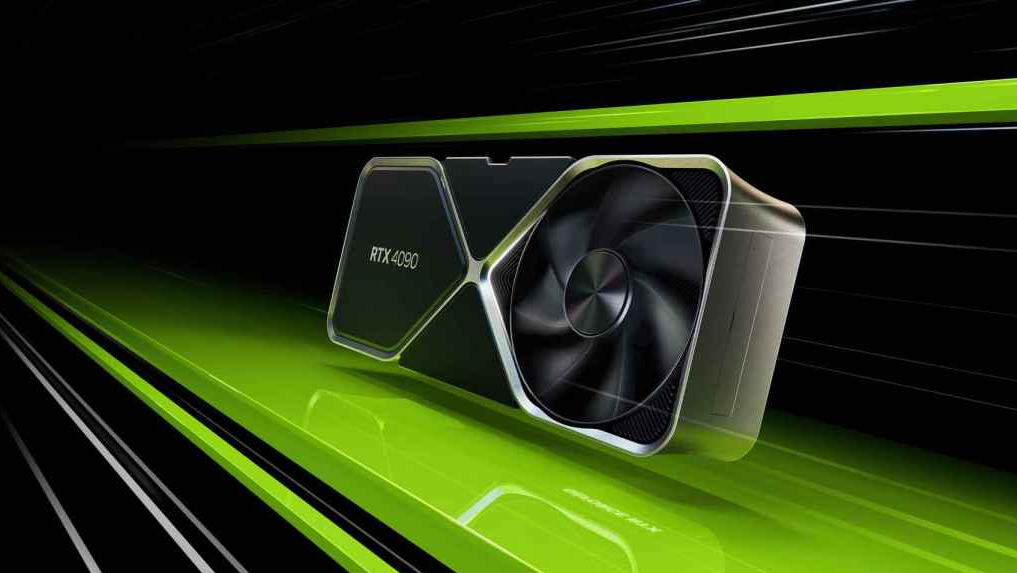

- Calcule la probabilidad de que la tarjeta sea defectuosa dado un resultado positivo para cada grupo, teniendo en cuenta todos los grupos de riesgo.

Como paso previo a la resolución, será necesario implementar una función que llamaremos "prob_defectuosa" con los datos indicados anteriormente. Esta función deberá de tomar como argumento la probabilidad a priori (probabilidades iniciales dadas en el enunciado), la sensibilidad (probabilidad de que un positivo sea defectuoso) y la especificidad (teniendo en cuenta que la probabilidad de que un positivo no sea realmente defectuoso se calcula como 1 - especificidad).

In [9]:
# Implemente la función prob_defectuosa
def prob_defectuosa(prob_priori, sensibilidad=0.99, especificidad=0.98):
    prob_falso_positivo = 1 - especificidad
    num = sensibilidad * prob_priori
    den = num + prob_falso_positivo * (1 - prob_priori)
    if den == 0:
        raise ZeroDivisionError("Probabilidad de que la tarjeta sea defectuosa: 0%")
    return num / den

# Calcule la probabilidad para cada uno de los tres grupos indicados en el enunciado
print("Probabilidad de que la tarjeta sea defectuosa dado un resultado positivo:")
print(f"- Riesgo muy bajo: {prob_defectuosa(prob_priori=0.005)}")
print(f"- Riesgo medio: {prob_defectuosa(prob_priori=0.02)}")
print(f"- Riesgo alto: {prob_defectuosa(prob_priori=0.08)}")

Probabilidad de que la tarjeta sea defectuosa dado un resultado positivo:
- Riesgo muy bajo: 0.1991951710261568
- Riesgo medio: 0.5025380710659897
- Riesgo alto: 0.8114754098360655
